In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Image
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show()
    return img

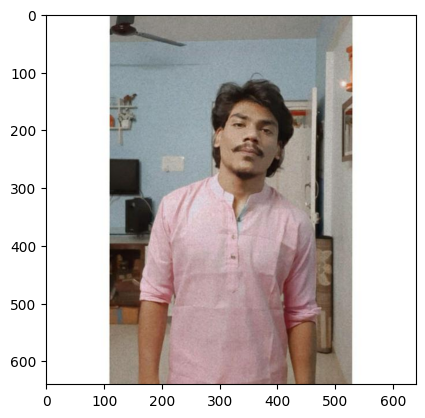

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
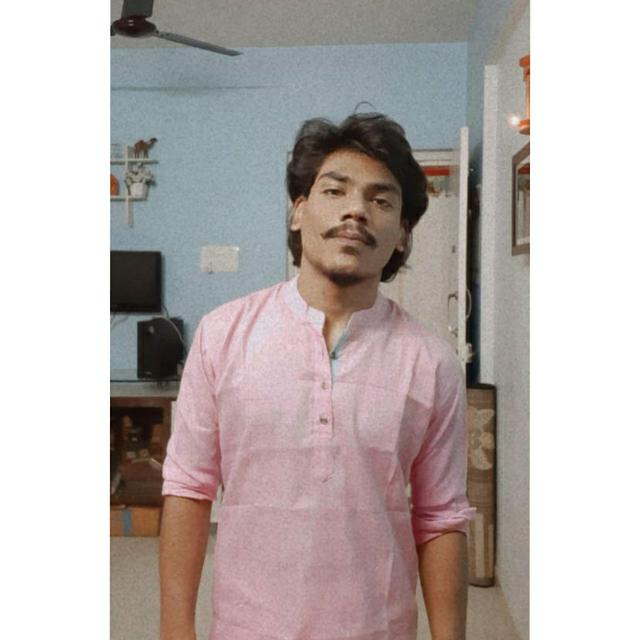

In [ ]:
filename="pp.jpg"
read_file(filename)

In [ ]:
#create edge mask
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

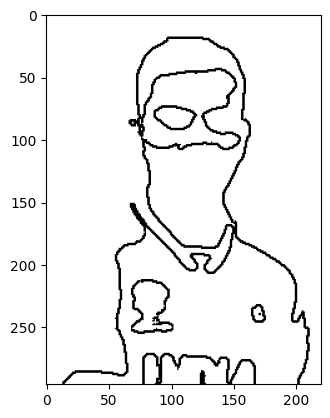

In [ ]:
line_size,blur_value=5,7
edges=edge_mask(img=img,line_size=line_size,blur_value=blur_value)
plt.imshow(edges,cmap='gray')
plt.show()


In [ ]:

##reduce the color pallete
def color_quantization(img,k):
    data=np.float32(img).reshape((-1,3))

    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

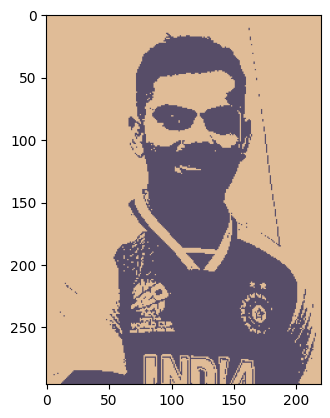

In [ ]:
img_quantize=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

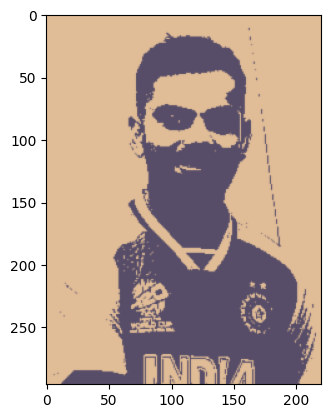

In [ ]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:
##combine edge mask with quantize_img
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()
    return c

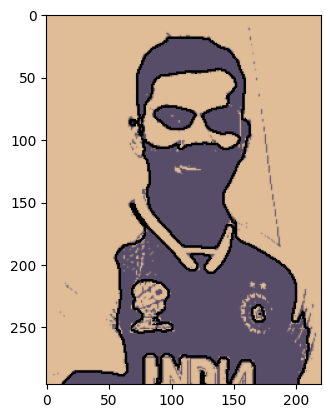

array([[[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]],

       [[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]],

       [[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]],

       ...,

       [[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]],

       [[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]],

       [[224, 188, 151],
        [224, 188, 151],
        [224, 188, 151],
        ...,
        [224, 188, 151],
        [224, 188, 151],
        [224, 188, 151]]], dtype=uint8)
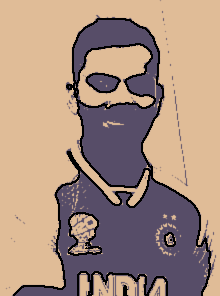

In [ ]:
cartoon()